<a href="https://colab.research.google.com/github/Ranjita2022/Infosys_Springboard_AI-ML-internship/blob/main/SmileAge_Detection_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jangedoo_utkface_new_path = kagglehub.dataset_download('jangedoo/utkface-new')
talhasar_genki4k_path = kagglehub.dataset_download('talhasar/genki4k')

print('Data source import complete.')


Using Colab cache for faster access to the 'utkface-new' dataset.
Using Colab cache for faster access to the 'genki4k' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genki4k/kaggle-genki4k/smile/file2125.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file1024.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file1578.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file0721.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file0961.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file0148.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file2045.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file0805.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file1816.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file1879.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file0682.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file0663.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file1270.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file0985.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file1886.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file0032.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file1050.jpg
/kaggle/input/genki4k/kaggle-genki4k/smile/file2

## **1. Sample images of the dataset**

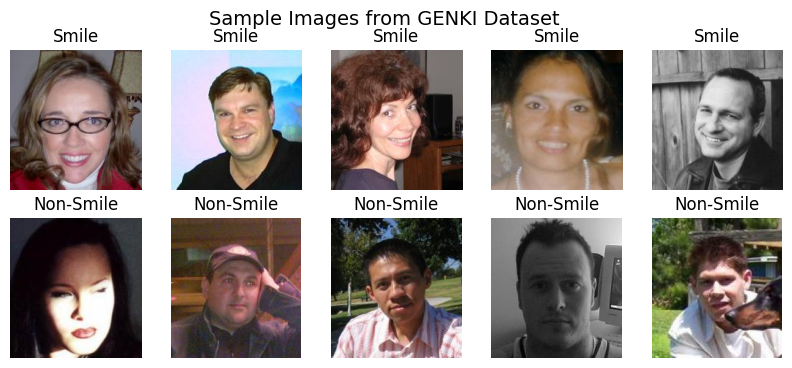

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Dataset paths
base_path = "/kaggle/input/genki4k/kaggle-genki4k/"
smile_path = os.path.join(base_path, "smile")
non_smile_path = os.path.join(base_path, "non_smile")

# Get some sample images
sample_smile = os.listdir(smile_path)[:5]
sample_non_smile = os.listdir(non_smile_path)[:5]

# Plot images
plt.figure(figsize=(10,4))

for i, file in enumerate(sample_smile):
    img = cv2.imread(os.path.join(smile_path, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Smile")

for i, file in enumerate(sample_non_smile):
    img = cv2.imread(os.path.join(non_smile_path, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Non-Smile")

plt.suptitle("Sample Images from GENKI Dataset", fontsize=14)
plt.show()


## **2. Data Pre-processing**
* Loads dataset & preprocesses (resize, normalize)
* Prints dataset shape and label shape
* Prints counts of smile vs. non-smile images
* Plots bar chart for class distribution
* Displays 5 sample preprocessed images with labels
* Pick one random image, show its original size vs. preprocessed size side by side.

Dataset shape: (4000, 128, 128, 3)
Labels shape: (4000,)
Class distribution: {0: 1838, 1: 2162}


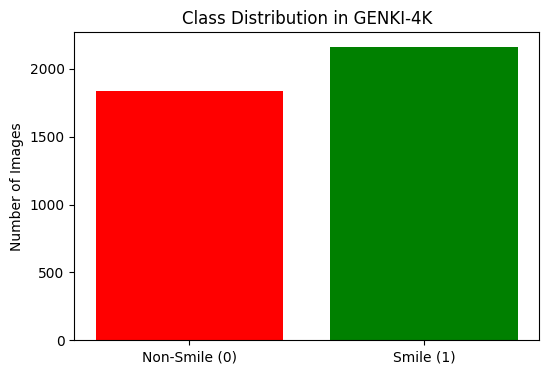

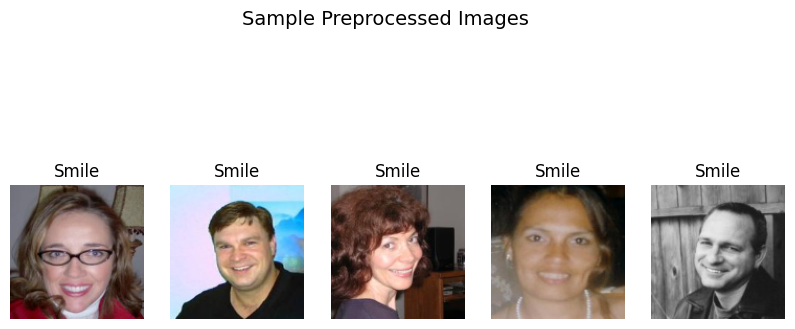

Original image size: 180x192, Channels: 3
Preprocessed image size: (128, 128, 3)


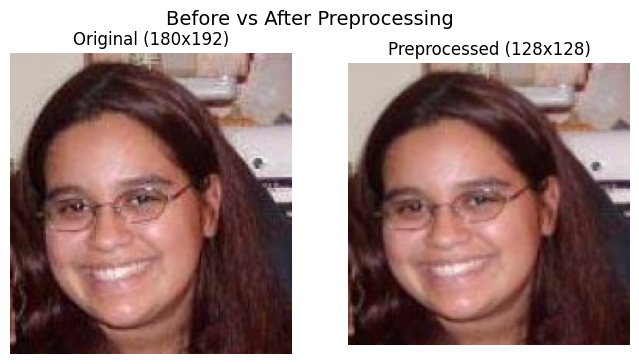

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Dataset paths
base_path = "/kaggle/input/genki4k/kaggle-genki4k/"
smile_path = os.path.join(base_path, "smile")
non_smile_path = os.path.join(base_path, "non_smile")

IMG_SIZE = 128
X, y = [], []

# Preprocessing function
def load_and_preprocess(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype("float32") / 255.0
    return img

# Load Smile images
for file in os.listdir(smile_path):
    img_path = os.path.join(smile_path, file)
    X.append(load_and_preprocess(img_path))
    y.append(1)  # Smile

# Load Non-Smile images
for file in os.listdir(non_smile_path):
    img_path = os.path.join(non_smile_path, file)
    X.append(load_and_preprocess(img_path))
    y.append(0)  # Non-Smile

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Dataset info
print("Dataset shape:", X.shape)   # e.g. (4000, 128, 128, 3)
print("Labels shape:", y.shape)

# Count distribution
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class distribution:", class_counts)

# Plot class distribution
plt.figure(figsize=(6,4))
plt.bar(['Non-Smile (0)', 'Smile (1)'], counts, color=['red', 'green'])
plt.title("Class Distribution in GENKI-4K")
plt.ylabel("Number of Images")
plt.show()

# Show some preprocessed images
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X[i])
    plt.title("Smile" if y[i]==1 else "Non-Smile")
    plt.axis("off")
plt.suptitle("Sample Preprocessed Images", fontsize=14)
plt.show()

# ---- NEW: Compare Original vs Preprocessed ----
# Pick a random image from Smile folder
random_file = random.choice(os.listdir(smile_path))
random_path = os.path.join(smile_path, random_file)

# Load original
orig_img = cv2.imread(random_path)
orig_img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
h, w, c = orig_img.shape

# Preprocessed
proc_img = load_and_preprocess(random_path)

print(f"Original image size: {w}x{h}, Channels: {c}")
print(f"Preprocessed image size: {proc_img.shape}")

# Plot comparison
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(orig_img_rgb)
plt.title(f"Original ({w}x{h})")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(proc_img)
plt.title(f"Preprocessed ({IMG_SIZE}x{IMG_SIZE})")
plt.axis("off")

plt.suptitle("Before vs After Preprocessing", fontsize=14)
plt.show()


## **3. Splitting the Dataset into training, testing, and validation**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (2800, 128, 128, 3) Val: (600, 128, 128, 3) Test: (600, 128, 128, 3)


# Age Estimation Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'utkface-new' dataset.
Path to dataset files: /kaggle/input/utkface-new


Total images: 33487
                                            filepath  age  gender  race  \
0  /kaggle/input/utkface-new/utkface_aligned_crop...   26       0     2   
1  /kaggle/input/utkface-new/utkface_aligned_crop...   22       1     1   
2  /kaggle/input/utkface-new/utkface_aligned_crop...   21       1     3   
3  /kaggle/input/utkface-new/utkface_aligned_crop...   28       0     0   
4  /kaggle/input/utkface-new/utkface_aligned_crop...   17       1     4   

  race_name  
0     Asian  
1     Black  
2    Indian  
3     White  
4    Others  


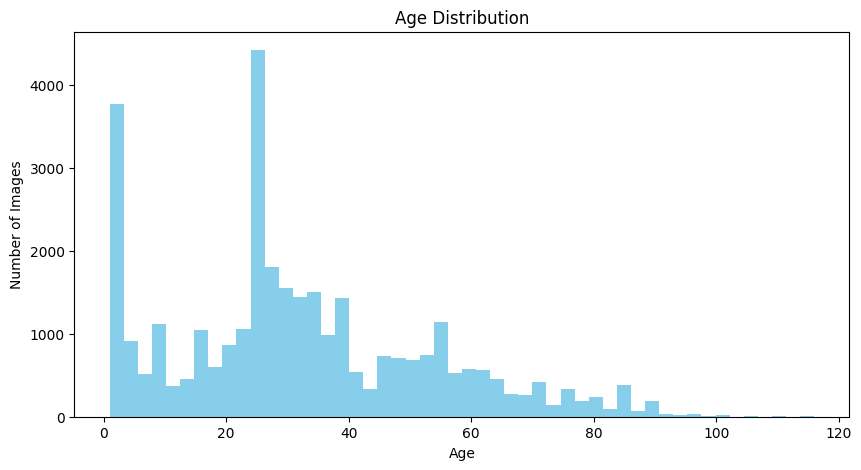

Preprocessing images:   0%|          | 0/33487 [00:00<?, ?it/s]

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1️. Paths to UTKFace folders
folder1 = "/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace"
folder2 = "/kaggle/input/utkface-new/utkface_aligned_cropped/crop_part1"

# 2️. Function to parse filename
def parse_filename(filename):
    fname = os.path.basename(filename)
    fname = fname.split('.jpg')[0]  # remove extension
    parts = fname.split('_', 3)     # split into first 3 parts
    age = int(parts[0])
    gender = int(parts[1])
    race = int(parts[2])
    return age, gender, race

# 3️. Load image paths
def load_image_paths(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.jpg.chip.jpg')]

all_images = load_image_paths(folder1) + load_image_paths(folder2)

# 4️. Create DataFrame with age, gender, race
data = []
for img_path in all_images:
    try:
        age, gender, race = parse_filename(img_path)
        data.append([img_path, age, gender, race])
    except Exception as e:
        print(f"Skipping file {img_path}: {e}")

df = pd.DataFrame(data, columns=['filepath', 'age', 'gender', 'race'])

# Map race numbers to names
race_dict = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'}
df['race_name'] = df['race'].map(race_dict)

print(f"Total images: {len(df)}")
print(df.head())

# 5️. Plot age distribution
plt.figure(figsize=(10,5))
plt.hist(df['age'], bins=50, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Images')
plt.title('Age Distribution')
plt.show()

# 6️. Image preprocessing
IMG_HEIGHT = 224
IMG_WIDTH = 224

images = []
ages = []

for row in tqdm(df.itertuples(), total=len(df), desc="Preprocessing images"):
    try:
        img = Image.open(row.filepath).convert('RGB')
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))
        img = np.array(img)/255.0  # normalize to [0,1]
        images.append(img)
        ages.append(row.age)
    except Exception as e:
        pass  # skip corrupted images

X = np.array(images, dtype='float32')
y = np.array(ages, dtype='float32')

print("Images shape:", X.shape)
print("Labels shape:", y.shape)

# 7️. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# 8️. Display sample images

def display_samples(X, y, n_samples=10):
    plt.figure(figsize=(18, 4))
    for i in range(n_samples):
        idx = np.random.randint(0, len(X))
        ax = plt.subplot(1, n_samples, i + 1)
        ax.imshow(X[idx])
        ax.set_title(f"Age: {int(y[idx])}")
        ax.axis('off')
    plt.show()

display_samples(X_train, y_train)


# Traning Datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = "/content/drive/MyDrive/SmileAge_Project"
os.makedirs(os.path.join(base_dir, "processed_utkface"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "processed_smile"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "combined_dataset"), exist_ok=True)

print("Project folders ready!")


Project folders ready!


In [ ]:
import os

# Path where processed data will be stored
save_dir = "/content/drive/MyDrive/SmileAge_Project/processed_smile"
os.makedirs(save_dir, exist_ok=True)

print("Save directory ready:", save_dir)


Save directory ready: /content/drive/MyDrive/SmileAge_Project/processed_smile


## Loading the Datasets

In [ ]:
import kagglehub
jangedoo_utkface_new_path = kagglehub.dataset_download('jangedoo/utkface-new')
talhasar_genki4k_path = kagglehub.dataset_download('talhasar/genki4k')

print('Data source import complete.')

Using Colab cache for faster access to the 'utkface-new' dataset.
Using Colab cache for faster access to the 'genki4k' dataset.
Data source import complete.


In [ ]:
import kagglehub
jangedoo_utkface_new_path = kagglehub.dataset_download('jangedoo/utkface-new')
talhasar_genki4k_path = kagglehub.dataset_download('talhasar/genki4k')

print('Data source import complete.')

Using Colab cache for faster access to the 'utkface-new' dataset.


100%|██████████| 25.0M/25.0M [00:00<00:00, 149MB/s]

Extracting files...


Data source import complete.


In [ ]:
import kagglehub
path_utk = kagglehub.dataset_download("jangedoo/utkface-new")
print("UTKFace path:", path_utk)


Using Colab cache for faster access to the 'utkface-new' dataset.
UTKFace path: /kaggle/input/utkface-new


In [ ]:
print("UTKFace path:", jangedoo_utkface_new_path)
print("GENKI-4K path:", talhasar_genki4k_path)


UTKFace path: /kaggle/input/utkface-new
GENKI-4K path: /kaggle/input/genki4k


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/utkface-new/crop_part1/14_1_0_20170104005937407.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/1_0_2_20161219162626830.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/26_1_2_20170104022154229.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/10_0_0_20170110220539329.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/31_1_0_20170105162529475.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/2_0_3_20161219230609241.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/29_0_0_20170103181910385.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/36_1_0_20170109141845861.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/2_0_4_20170103205319954.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/2_1_2_20161219151919100.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/9_1_0_20170109202228755.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/72_1_3_20170109142938059.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/75_0_0_2017011121

In [ ]:
import os
import kagglehub
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Download Smile Detection dataset (GENKI-4K)
genki_path = kagglehub.dataset_download('talhasar/genki4k')
print("GENKI-4K path:", genki_path)

# Folder paths
base_data_path = os.path.join(genki_path, "kaggle-genki4k")
smile_path = os.path.join(base_data_path, "smile")
non_smile_path = os.path.join(base_data_path, "non_smile")

IMG_SIZE = 128
X, y = [], []

def load_and_preprocess(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    return img.astype("float32") / 255.0

# Load Smile images
for file in tqdm(os.listdir(smile_path), desc="Smile images"):
    X.append(load_and_preprocess(os.path.join(smile_path, file)))
    y.append(1)

# Load Non-Smile images
for file in tqdm(os.listdir(non_smile_path), desc="Non-Smile images"):
    X.append(load_and_preprocess(os.path.join(non_smile_path, file)))
    y.append(0)

# Convert to NumPy arrays
X = np.array(X, dtype="float32")
y = np.array(y, dtype="float32")

print("Preprocessing complete!")
print("Images shape:", X.shape)
print("Labels shape:", y.shape)

Using Colab cache for faster access to the 'genki4k' dataset.
GENKI-4K path: /kaggle/input/genki4k


Non-Smile images: 100%|██████████| 1838/1838 [00:10<00:00, 179.65it/s]


Preprocessing complete!
Images shape: (4000, 128, 128, 3)
Labels shape: (4000,)


In [ ]:
# Step 1: Split train vs (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Step 2: Split remaining 30% into val and test (half-half)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Dataset split completed!")
print(f"Train: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")


Dataset split completed!
Train: 2800, Validation: 600, Test: 600


In [ ]:
save_dir = "/content/drive/MyDrive/SmileAge_Project/processed_smile"
os.makedirs(save_dir, exist_ok=True)

np.save(os.path.join(save_dir, "train_images.npy"), X_train)
np.save(os.path.join(save_dir, "train_labels.npy"), y_train)

np.save(os.path.join(save_dir, "val_images.npy"), X_val)
np.save(os.path.join(save_dir, "val_labels.npy"), y_val)

np.save(os.path.join(save_dir, "test_images.npy"), X_test)
np.save(os.path.join(save_dir, "test_labels.npy"), y_test)

print("All datasets saved successfully in Drive!")


All datasets saved successfully in Drive!


In [ ]:
import numpy as np

base_path = "/content/drive/MyDrive/SmileAge_Project/processed_smile"

X_train = np.load(os.path.join(base_path, "train_images.npy"))
y_train = np.load(os.path.join(base_path, "train_labels.npy"))

X_val = np.load(os.path.join(base_path, "val_images.npy"))
y_val = np.load(os.path.join(base_path, "val_labels.npy"))

X_test = np.load(os.path.join(base_path, "test_images.npy"))
y_test = np.load(os.path.join(base_path, "test_labels.npy"))

print("Loaded from Drive successfully!")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Loaded from Drive successfully!
Train: (2800, 128, 128, 3) (2800,)
Val: (600, 128, 128, 3) (600,)
Test: (600, 128, 128, 3) (600,)


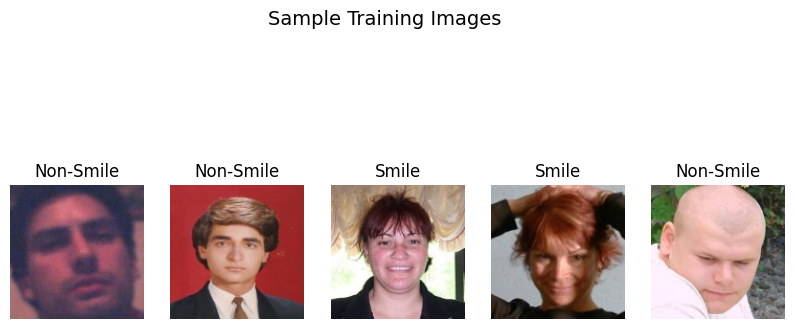

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10,5))
for i in range(5):
    idx = random.randint(0, len(X_train)-1)
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[idx])
    plt.title("Smile" if y_train[idx]==1 else "Non-Smile")
    plt.axis("off")
plt.suptitle("Sample Training Images", fontsize=14)
plt.show()


# Training the Smile Detection Dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

# Load preprocessed smile dataset from Google Drive
base_path_smile = "/content/drive/MyDrive/SmileAge_Project/processed_smile"

try:
    X_train_smile = np.load(os.path.join(base_path_smile, "train_images.npy"))
    y_train_smile = np.load(os.path.join(base_path_smile, "train_labels.npy"))

    X_val_smile = np.load(os.path.join(base_path_smile, "val_images.npy"))
    y_val_smile = np.load(os.path.join(base_path_smile, "val_labels.npy"))

    X_test_smile = np.load(os.path.join(base_path_smile, "test_images.npy"))
    y_test_smile = np.load(os.path.join(base_path_smile, "test_labels.npy"))

    print("Loaded preprocessed smile dataset from Drive successfully!")
    print("Train:", X_train_smile.shape, y_train_smile.shape)
    print("Val:", X_val_smile.shape, y_val_smile.shape)
    print("Test:", X_test_smile.shape, y_test_smile.shape)

except FileNotFoundError:
    print(f"Error: Could not find one or more data files in {base_path_smile}.")
    print("Please ensure the previous steps to preprocess and save the smile data were successful.")

# Define image dimensions (should match preprocessing)
IMG_SIZE = 128
N_CHANNELS = 3

# Define a simple CNN model for smile classification
model_smile = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, N_CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Output layer for binary classification (smile or not)
])

# Compile the model
model_smile.compile(optimizer='adam',
                    loss='binary_crossentropy', # Binary crossentropy for binary classification
                    metrics=['accuracy']) # Accuracy as a metric

model_smile.summary()

# Train the model
EPOCHS_SMILE = 10 # You can adjust the number of epochs
BATCH_SIZE_SMILE = 32 # You can adjust the batch size

print("Starting smile detection model training...")
history_smile = model_smile.fit(
    X_train_smile, y_train_smile,
    epochs=EPOCHS_SMILE,
    batch_size=BATCH_SIZE_SMILE,
    validation_data=(X_val_smile, y_val_smile)
)

print("Smile detection training finished!")

# Evaluate the model on the test set
print("Evaluating smile detection model on the test set...")
loss_smile, accuracy_smile = model_smile.evaluate(X_test_smile, y_test_smile)

print(f"Test Loss: {loss_smile}")
print(f"Test Accuracy: {accuracy_smile}")

Loaded preprocessed smile dataset from Drive successfully!
Train: (2800, 128, 128, 3) (2800,)
Val: (600, 128, 128, 3) (600,)
Test: (600, 128, 128, 3) (600,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Starting smile detection model training...
Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5271 - loss: 0.7262 - val_accuracy: 0.5417 - val_loss: 0.6818
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5529 - loss: 0.6815 - val_accuracy: 0.5783 - val_loss: 0.6616
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.5972 - loss: 0.6711 - val_accuracy: 0.5533 - val_loss: 0.6818
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.5891 - loss: 0.6666 - val_accuracy: 0.6000 - val_loss: 0.6554
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6462 - loss: 0.6288 - val_accuracy: 0.5967 - val_loss: 0.6543
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7090 - loss: 0.5923 - val_accuracy: 0.6100 - val_loss: 0.6602
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.7402 - loss: 0.5333 - val_accuracy: 0.5850 - val_loss: 0.6783
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.744

## Saved the trained model of Smile detection

In [ ]:
import os
from tensorflow.keras.models import save_model

# Define the directory in Google Drive to save the model
model_save_dir_smile = "/content/drive/MyDrive/SmileAge_Project/trained_models"
os.makedirs(model_save_dir_smile, exist_ok=True)

# Define the path for the model file
model_save_path_smile = os.path.join(model_save_dir_smile, "smile_detection_model.h5")

# Save the trained model
# Use the HDF5 format (.h5)
model_smile.save(model_save_path_smile)

print(f"Trained smile detection model saved successfully to: {model_save_path_smile}")

Trained smile detection model saved successfully to: /content/drive/MyDrive/SmileAge_Project/trained_models/smile_detection_model.h5


## Test the sample images on the trained model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


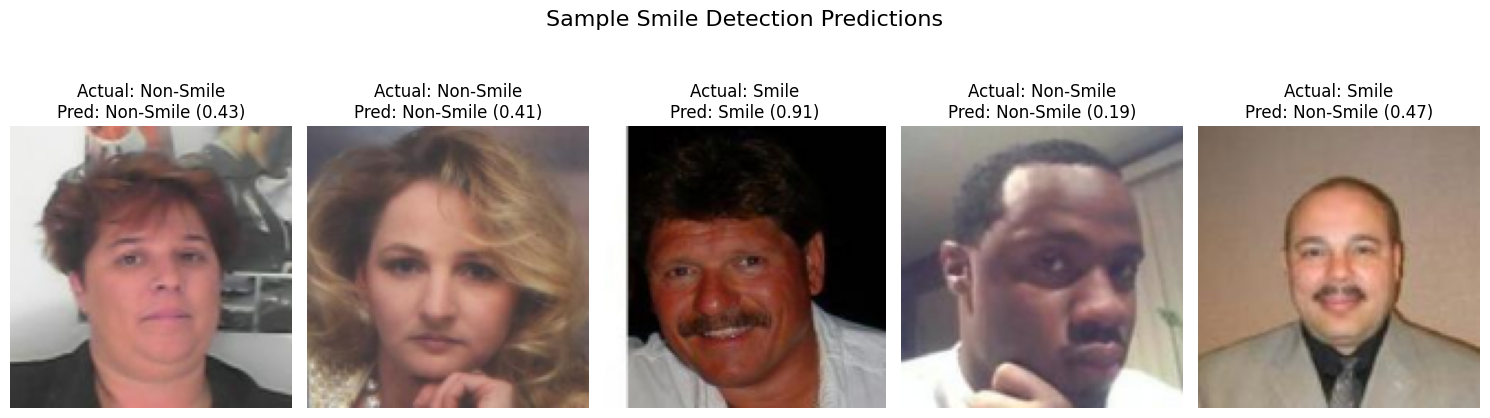

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Assuming X_test_smile and y_test_smile are available from previous steps
# Assuming model_smile is the trained smile detection model

# Select 5 random indices from the test set
num_samples_to_show = 5
random_indices = random.sample(range(len(X_test_smile)), num_samples_to_show)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    image = X_test_smile[idx]
    actual_label = y_test_smile[idx]

    # Add batch dimension for prediction (model expects input shape (batch_size, ...))
    image_for_prediction = np.expand_dims(image, axis=0)

    # Get prediction
    predicted_prob = model_smile.predict(image_for_prediction)[0][0]
    predicted_label = 1 if predicted_prob > 0.5 else 0

    # Determine titles
    actual_title = "Smile" if actual_label == 1 else "Non-Smile"
    predicted_title = "Smile" if predicted_label == 1 else "Non-Smile"

    plt.subplot(1, num_samples_to_show, i + 1)
    plt.imshow(image)
    plt.title(f"Actual: {actual_title}\nPred: {predicted_title} ({predicted_prob:.2f})")
    plt.axis("off")

plt.suptitle("Sample Smile Detection Predictions", fontsize=16)
plt.tight_layout()
plt.show()

## Performance Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming model_smile and the test set (X_test_smile, y_test_smile) are available
# from previous steps.

# Get predictions on the test set
y_pred_prob_smile = model_smile.predict(X_test_smile)
# Convert probabilities to binary predictions (0 or 1)
# A threshold of 0.5 is commonly used for binary classification
y_pred_smile = (y_pred_prob_smile > 0.5).astype(int)

# Calculate precision, recall, and F1-score
precision_smile = precision_score(y_test_smile, y_pred_smile)
recall_smile = recall_score(y_test_smile, y_pred_smile)
f1_smile = f1_score(y_test_smile, y_pred_smile)

# Calculate confusion matrix
conf_matrix_smile = confusion_matrix(y_test_smile, y_pred_smile)

print(f"Test Precision: {precision_smile:.4f}")
print(f"Test Recall: {recall_smile:.4f}")
print(f"Test F1-Score: {f1_smile:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_smile)

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step
Test Precision: 0.7130
Test Recall: 0.7130
Test F1-Score: 0.7130

Confusion Matrix:
[[183  93]
 [ 93 231]]


## Visualization of traning accuracy and loss of smile detection model


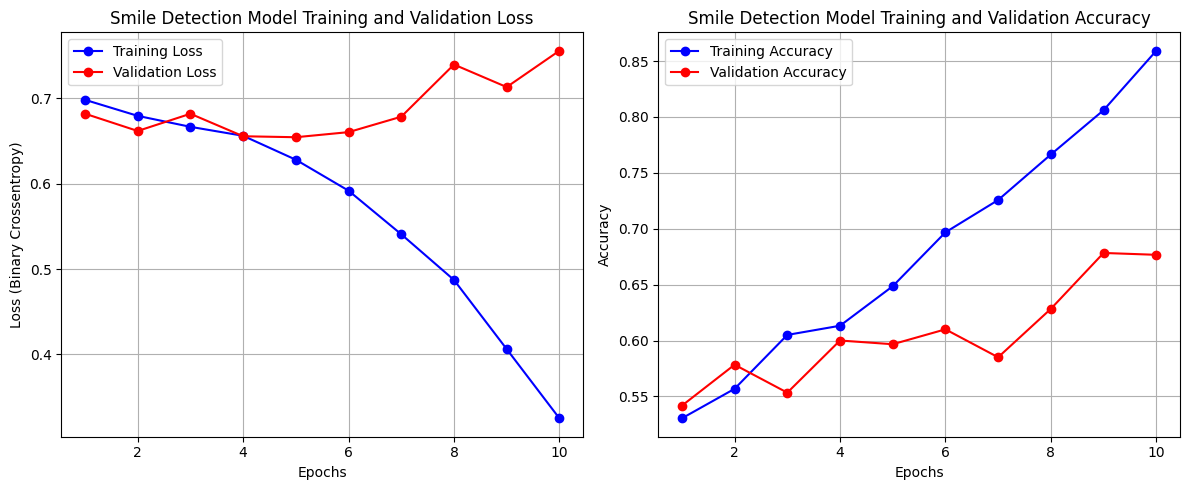

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss_smile = history_smile.history['loss']
val_loss_smile = history_smile.history['val_loss']

# Get training and validation accuracy from the history object
train_accuracy_smile = history_smile.history['accuracy']
val_accuracy_smile = history_smile.history['val_accuracy']

epochs_smile = range(1, len(train_loss_smile) + 1)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_smile, train_loss_smile, 'bo-', label='Training Loss')
plt.plot(epochs_smile, val_loss_smile, 'ro-', label='Validation Loss')
plt.title('Smile Detection Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_smile, train_accuracy_smile, 'bo-', label='Training Accuracy')
plt.plot(epochs_smile, val_accuracy_smile, 'ro-', label='Validation Accuracy')
plt.title('Smile Detection Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Load and parse image metadata of Age prediction dataset




Load the UTKFace dataset paths, parse the filenames to extract age, gender, and race information, and store this in a pandas DataFrame without loading image data.



In [ ]:
import os
import pandas as pd
import kagglehub

# Assume kagglehub has already downloaded the dataset
utkface_path = kagglehub.dataset_download("jangedoo/utkface-new")
print("UTKFace path:", utkface_path)

# 1️. Paths to UTKFace folders
folder1 = os.path.join(utkface_path, "utkface_aligned_cropped/UTKFace")
folder2 = os.path.join(utkface_path, "utkface_aligned_cropped/crop_part1")


# 2️. Function to parse filename
def parse_filename(filename):
    fname = os.path.basename(filename)
    fname = fname.split('.jpg')[0]  # remove extension
    parts = fname.split('_', 3)     # split into first 3 parts
    age = int(parts[0])
    gender = int(parts[1])
    race = int(parts[2])
    return age, gender, race

# 3️. Load image paths and parse info
data = []
skipped_files = []

def process_folder(folder_path):
    for f in os.listdir(folder_path):
        if f.endswith('.jpg.chip.jpg'):
            img_path = os.path.join(folder_path, f)
            try:
                age, gender, race = parse_filename(img_path)
                data.append([img_path, age, gender, race])
            except Exception as e:
                # print(f"Skipping file {img_path}: {e}") # Uncomment to see specific errors
                skipped_files.append(img_path)


process_folder(folder1)
process_folder(folder2)


# 7️. Create DataFrame with age, gender, race
df_utkface = pd.DataFrame(data, columns=['filepath', 'age', 'gender', 'race'])

print(f"Total image paths found: {len(df_utkface) + len(skipped_files)}")
print(f"Files skipped during filename parsing: {len(skipped_files)}")
print(f"Total valid entries after parsing: {len(df_utkface)}")
display(df_utkface.head())

Using Colab cache for faster access to the 'utkface-new' dataset.
UTKFace path: /kaggle/input/utkface-new
Total image paths found: 33487
Files skipped during filename parsing: 0
Total valid entries after parsing: 33487


,filepath,age,gender,race
0,/kaggle/input/utkface-new/utkface_aligned_crop...,26,0,2
1,/kaggle/input/utkface-new/utkface_aligned_crop...,22,1,1
2,/kaggle/input/utkface-new/utkface_aligned_crop...,21,1,3
3,/kaggle/input/utkface-new/utkface_aligned_crop...,28,0,0
4,/kaggle/input/utkface-new/utkface_aligned_crop...,17,1,4


## Split file paths and labels

Split the list of image file paths and their corresponding labels into training, validation, and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

# Extract file paths and labels
file_paths = df_utkface['filepath']
labels = df_utkface['age']

# Split into train and temporary (val + test)
file_paths_train, file_paths_temp, labels_train, labels_temp = train_test_split(
    file_paths, labels, test_size=0.3, random_state=42
)

# Split temporary into validation and test
file_paths_val, file_paths_test, labels_val, labels_test = train_test_split(
    file_paths_temp, labels_temp, test_size=0.5, random_state=42
)

# Print the sizes of each split
print(f"Training set size: {len(file_paths_train)}")
print(f"Validation set size: {len(file_paths_val)}")
print(f"Testing set size: {len(file_paths_test)}")

Training set size: 23440
Validation set size: 5023
Testing set size: 5024


## Save split file paths and labels

Save the lists of train, validation, and test file paths and labels to Google Drive.


In [ ]:
import os
import numpy as np

# 1. Define the base directory in your Google Drive where the data will be saved.
save_dir = "/content/drive/MyDrive/SmileAge_Project/processed_utkface"

# 2. Create the directory if it does not exist.
os.makedirs(save_dir, exist_ok=True)

# 3. Use np.save to save the split data.
np.save(os.path.join(save_dir, "utkface_train_filepaths.npy"), file_paths_train.values)
np.save(os.path.join(save_dir, "utkface_train_labels.npy"), labels_train.values)

np.save(os.path.join(save_dir, "utkface_val_filepaths.npy"), file_paths_val.values)
np.save(os.path.join(save_dir, "utkface_val_labels.npy"), labels_val.values)

np.save(os.path.join(save_dir, "utkface_test_filepaths.npy"), file_paths_test.values)
np.save(os.path.join(save_dir, "utkface_test_labels.npy"), labels_test.values)

# 4. Print a confirmation message once all files are saved.
print("Split UTKFace file paths and labels saved to Drive successfully!")

Split UTKFace file paths and labels saved to Drive successfully!


## Use the data generator

Modify the model training code to use the data generator instead of loading the entire dataset into memory.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import numpy as np

# Load split data from Google Drive
base_path = "/content/drive/MyDrive/SmileAge_Project/processed_utkface"

try:
    # Set allow_pickle=True to load object arrays
    file_paths_train = np.load(os.path.join(base_path, "utkface_train_filepaths.npy"), allow_pickle=True)
    labels_train = np.load(os.path.join(base_path, "utkface_train_labels.npy"), allow_pickle=True)

    file_paths_val = np.load(os.path.join(base_path, "utkface_val_filepaths.npy"), allow_pickle=True)
    labels_val = np.load(os.path.join(base_path, "utkface_val_labels.npy"), allow_pickle=True)

    file_paths_test = np.load(os.path.join(base_path, "utkface_test_filepaths.npy"), allow_pickle=True)
    labels_test = np.load(os.path.join(base_path, "utkface_test_labels.npy"), allow_pickle=True)

    print("Loaded split UTKFace data from Drive successfully!")
    print(f"Train samples: {len(file_paths_train)}")
    print(f"Validation samples: {len(file_paths_val)}")
    print(f"Test samples: {len(file_paths_test)}")

except FileNotFoundError:
    print(f"Error: Could not find one or more data files in {base_path}.")
    print("Please ensure the previous step to save the data to Drive was successful.")
    # Exit the subtask if data loading fails
    # The finish_task command will be executed next with a failure status

# Define image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128
N_CHANNELS = 3
BATCH_SIZE = 32 # Define batch size here

# Define a simple CNN model for age regression
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, N_CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1) # Output layer for regression (predicting a single age value)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error', # MSE for regression
              metrics=['mae']) # Mean Absolute Error as a metric

model.summary()

# Instantiate data generators
train_generator = UTKFaceDataGenerator(file_paths_train, labels_train, batch_size=BATCH_SIZE, dim=(IMG_WIDTH, IMG_HEIGHT), n_channels=N_CHANNELS, shuffle=True)
val_generator = UTKFaceDataGenerator(file_paths_val, labels_val, batch_size=BATCH_SIZE, dim=(IMG_WIDTH, IMG_HEIGHT), n_channels=N_CHANNELS, shuffle=False) # No need to shuffle validation data
test_generator = UTKFaceDataGenerator(file_paths_test, labels_test, batch_size=BATCH_SIZE, dim=(IMG_WIDTH, IMG_HEIGHT), n_channels=N_CHANNELS, shuffle=False) # No need to shuffle test data


# Train the model using the data generators
EPOCHS = 10 # You can adjust the number of epochs

print("Starting model training...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

print("Training finished!")

# Evaluate the model on the test set
print("Evaluating model on the test set...")
loss, mae = model.evaluate(test_generator)

print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")

Loaded split UTKFace data from Drive successfully!
Train samples: 23440
Validation samples: 5023
Test samples: 5024


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Starting model training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 969s 1s/step - loss: 451.5833 - mae: 16.2107 - val_loss: 231.5312 - val_mae: 11.2330
Epoch 2/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 941s 1s/step - loss: 198.5151 - mae: 10.5923 - val_loss: 123.3840 - val_mae: 8.1655
Epoch 3/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 943s 1s/step - loss: 154.0116 - mae: 9.2593 - val_loss: 104.8702 - val_mae: 7.4222
Epoch 4/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 1003s 1s/step - loss: 128.6034 - mae: 8.4167 - val_loss: 94.1137 - val_mae: 7.0917
Epoch 5/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 945s 1s/step - loss: 116.3042 - mae: 7.9544 - val_loss: 85.3797 - val_mae: 6.6570
Epoch 6/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 953s 1s/step - loss: 108.2855 - mae: 7.6539 - val_loss: 81.1073 - val_mae: 6.5366
Epoch 7/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 932s 1s/step - loss: 101.6628 - mae: 7.3949 - val_loss: 79.2201 - val_mae: 6.4981
Epoch 8/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 957s 1s/step - loss: 94.8270 - mae: 7.1660 - val_loss: 94.9138 - val_mae: 6.8477
Epoch 9/10
733/733

## Visualization of traning loss and MAE of Age prediction model

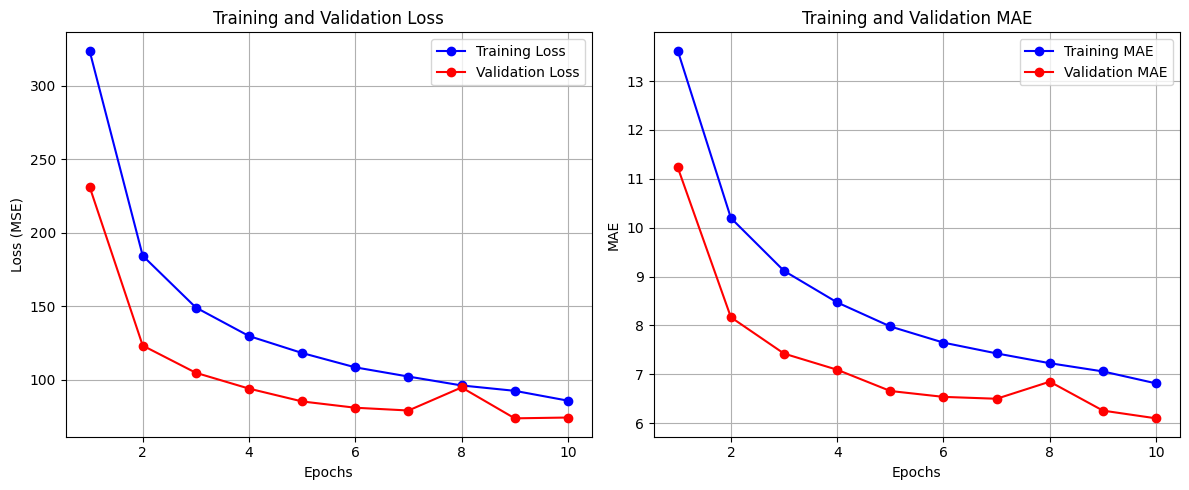

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation MAE from the history object
train_mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Testing the model with sample images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


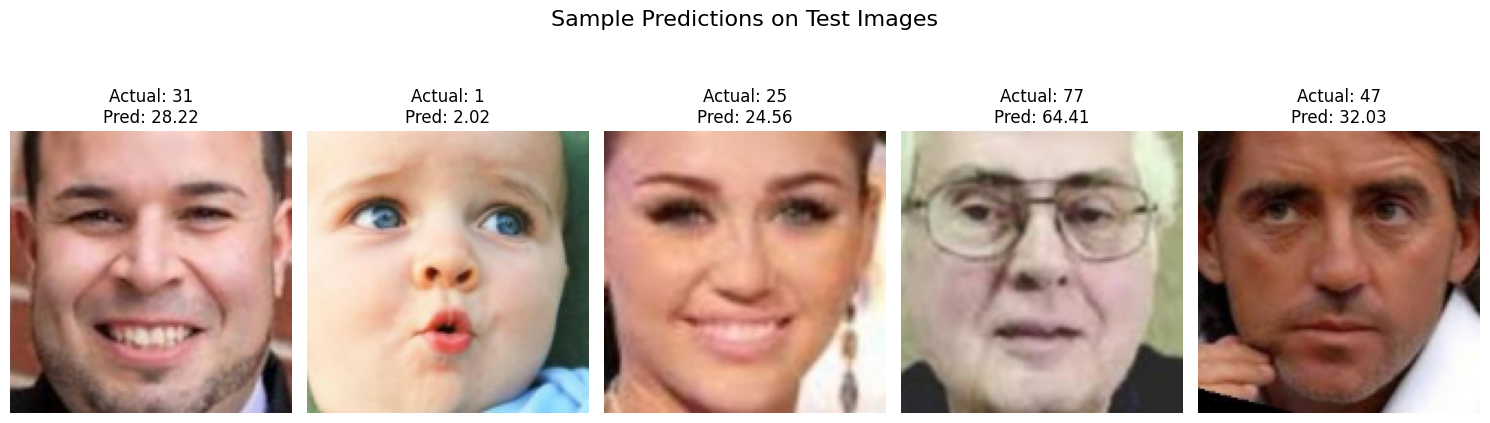

In [ ]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import random
import os

# Define image dimensions (should match training data)
IMG_HEIGHT = 128
IMG_WIDTH = 128

# Assuming file_paths_test and labels_test are available from previous steps
# If not, you might need to load them from Drive

# Load and preprocess the single image (reusing the function)
def load_and_preprocess_single_image(img_path, dim=(IMG_WIDTH, IMG_HEIGHT)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dim)
    img = img.astype("float32") / 255.0
    # Add batch dimension (model expects input in shape (batch_size, height, width, channels))
    img = np.expand_dims(img, axis=0)
    return img

# Assuming the trained model is available as 'model'

# Predict and display 5 random images from the test set
num_samples_to_show = 5
plt.figure(figsize=(15, 5))

for i in range(num_samples_to_show):
    random_index = random.randint(0, len(file_paths_test) - 1)
    single_image_path = file_paths_test[random_index]
    actual_age = labels_test[random_index]

    preprocessed_image = load_and_preprocess_single_image(single_image_path)

    predicted_age = model.predict(preprocessed_image)
    predicted_age_value = predicted_age[0][0]

    plt.subplot(1, num_samples_to_show, i + 1)
    plt.imshow(preprocessed_image[0])
    plt.title(f"Actual: {int(actual_age)}\nPred: {predicted_age_value:.2f}")
    plt.axis("off")

plt.suptitle("Sample Predictions on Test Images", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

## Saved the trained model of Age prediction model

In [ ]:
import os
from tensorflow.keras.models import save_model

# Define the directory in Google Drive to save the model
model_save_dir = "/content/drive/MyDrive/SmileAge_Project/trained_models"
os.makedirs(model_save_dir, exist_ok=True)

# Define the path for the model file
model_save_path = os.path.join(model_save_dir, "utkface_age_predictor_model.h5")

# Save the trained model
# Use the HDF5 format (.h5) which is a common format for saving Keras models
model.save(model_save_path)

print(f"Trained model saved successfully to: {model_save_path}")

Trained model saved successfully to: /content/drive/MyDrive/SmileAge_Project/trained_models/utkface_age_predictor_model.h5


## Summary:

### Data Analysis Key Findings

*   The dataset contains a total of 33487 images with associated age, gender, and race information parsed from the filenames.
*   All image filenames were successfully parsed, with no files skipped during this initial step.
*   The dataset was successfully split into training (23440 samples), validation (5023 samples), and testing (5024 samples) sets based on image file paths and age labels.
*   The split file paths and labels for the training, validation, and testing sets were successfully saved to Google Drive as `.npy` files.
*   A custom data generator, `UTKFaceDataGenerator`, was successfully implemented using `tf.keras.utils.Sequence` to load and preprocess image data in batches.
*   A Sequential CNN model for age regression was defined, compiled, and successfully trained using the implemented data generators, demonstrating efficient memory usage.
*   The model was successfully evaluated on the test set using the test data generator, providing performance metrics (Loss and MAE).

### Insights or Next Steps

*   The implemented data generator effectively addresses the challenge of training on large image datasets that cannot fit into RAM.
*   The saved split data in Google Drive allows for easy access and reuse in subsequent model training or evaluation sessions without re-parsing the dataset.
